<a href="https://colab.research.google.com/github/nitya798/C-Users-Nitya-shukla-Desktop-Temporary_add_to_version_control/blob/master/ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np


In [ ]:
img = image.load_img(r"/content/drive/MyDrive/computer vision/basedata/training/happy/1.png")

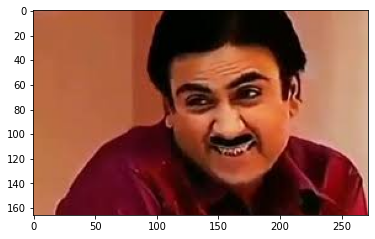

In [ ]:
plt.imshow(img)

In [ ]:
cv2.imread(r"/content/drive/MyDrive/computer vision/basedata/training/happy/1.png")

array([[[ 94, 112, 183],
        [ 95, 113, 184],
        [ 93, 113, 184],
        ...,
        [138, 166, 213],
        [139, 167, 214],
        [140, 169, 214]],

       [[ 89, 107, 178],
        [ 87, 107, 178],
        [ 88, 108, 179],
        ...,
        [138, 166, 213],
        [139, 167, 214],
        [140, 169, 214]],

       [[ 81, 100, 173],
        [ 79, 101, 173],
        [ 80, 102, 174],
        ...,
        [138, 166, 213],
        [139, 167, 214],
        [140, 169, 214]],

       ...,

       [[ 94, 126, 197],
        [ 94, 126, 197],
        [ 93, 126, 199],
        ...,
        [ 34,  15, 161],
        [ 18,   2, 140],
        [ 94,  85, 202]],

       [[ 95, 127, 198],
        [ 95, 127, 198],
        [ 93, 126, 199],
        ...,
        [ 37,  18, 165],
        [ 16,   0, 140],
        [ 70,  60, 180]],

       [[ 95, 127, 198],
        [ 95, 127, 198],
        [ 93, 126, 199],
        ...,
        [ 40,  20, 169],
        [ 15,   0, 139],
        [ 48,  38, 158]]

In [ ]:
cv2.imread(r"/content/drive/MyDrive/computer vision/basedata/training/happy/1.png").shape

(166, 272, 3)

In [ ]:
training = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = training.flow_from_directory(r"/content/drive/MyDrive/computer vision/basedata/training", target_size=(200,200), batch_size= 3, class_mode= 'binary')

Found 20 images belonging to 2 classes.


In [ ]:
validation_dataset = validation.flow_from_directory(r"/content/drive/MyDrive/computer vision/basedata/validation", target_size=(200,200), batch_size= 3, class_mode= 'binary')

Found 0 images belonging to 2 classes.


In [ ]:
train_dataset.class_indices

{'happy': 0, 'not_happy': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dense(1,activation='sigmoid')]
  
)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer= RMSprop(lr=0.001), metrics=['accuracy'])

In [ ]:
model_fit= model.fit(train_dataset,
                     steps_per_epoch=3,
                     epochs=30,
                     validation_data= validation_dataset)

Epoch 1/30
3/3 [==============================] - 1s 407ms/step - loss: 0.2901 - accuracy: 1.0000
Epoch 2/30
3/3 [==============================] - 1s 395ms/step - loss: 0.6310 - accuracy: 0.6250
Epoch 3/30
3/3 [==============================] - 1s 398ms/step - loss: 0.2911 - accuracy: 0.7778
Epoch 4/30
3/3 [==============================] - 1s 395ms/step - loss: 0.3961 - accuracy: 0.7778
Epoch 5/30
3/3 [==============================] - 1s 405ms/step - loss: 0.0894 - accuracy: 1.0000
Epoch 6/30
3/3 [==============================] - 1s 384ms/step - loss: 0.0991 - accuracy: 1.0000
Epoch 7/30
3/3 [==============================] - 1s 395ms/step - loss: 0.0318 - accuracy: 1.0000
Epoch 8/30
3/3 [==============================] - 1s 384ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 9/30
3/3 [==============================] - 1s 383ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 10/30
3/3 [==============================] - 1s 376ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 11/30
3/3 [==

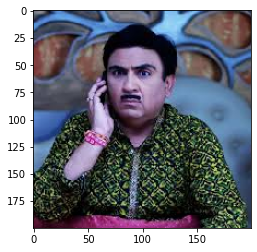

sad


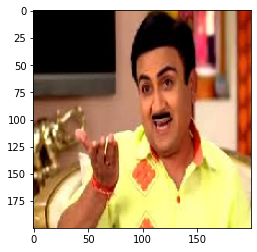

happy


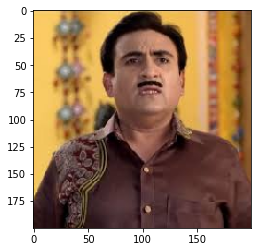

sad


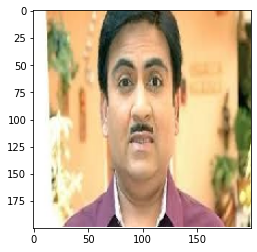

happy


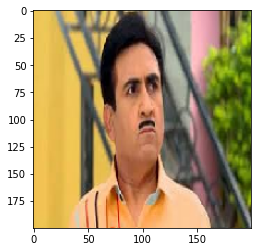

sad


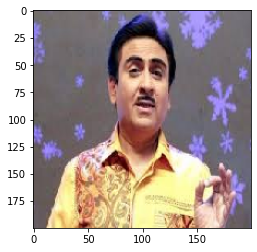

happy


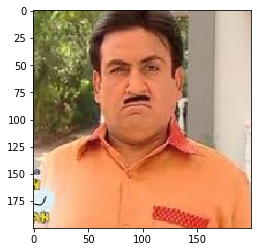

sad


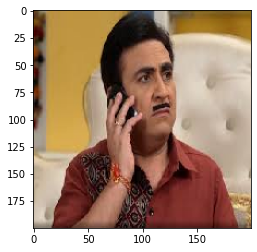

sad


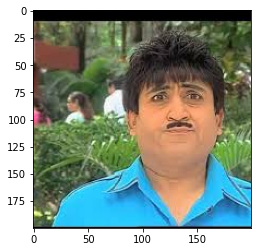

sad


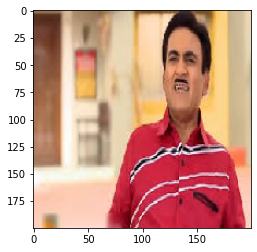

happy


In [ ]:
dir_path= r"/content/drive/MyDrive/computer vision/basedata/testing"
for i in os.listdir(dir_path):
  img=image.load_img(dir_path+'//'+i, target_size=(200,200,3))
  plt.imshow(img)
  plt.show()
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  val=model.predict(images)
  if val==0:
    print("happy")
  else:
    print("sad")